# Laser Line Detection

In [559]:
import astropy.io.fits as pf
import matplotlib.pylab as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
import math
from mpmath import mp

## Signal Injection
Copied from Anna Zuckerman's Github repository: https://github.com/annazuckerman/specmatch-emp-apf

In [586]:
mp.dps=100
exp_array = np.frompyfunc(mp.exp, 1, 1)

# function to insert simulated gaussians
def insert_gaussian(spectrum, gaussian_params, midpoint, numpoints):
    height = gaussian_params[0]
    position = gaussian_params[1] #position within segment, not index in spectrum
    FWHM = gaussian_params[2]
    offset = gaussian_params[3]
    x = np.linspace(0,numpoints-1,numpoints) # numpoints must be odd            #### why does this start at 0?
    gauss = gaussian(x,height,position,FWHM/(2*np.sqrt(2*np.log(2))),offset)
    new_spect = spectrum.copy()
    new_spect[midpoint - math.floor(numpoints/2):midpoint + math.floor(numpoints/2)] = gauss
    return new_spect
    
def gaussian(x,a,b,c,d): # a = height, b = position of peak, c = width, x = numpy array of x values
    f = a*exp_array((-(x-b)**2)/(2*c)**2) + d
    return f 

## Read and reduce APF data
Refer to APFtutorial for details about APF data reduction

In [587]:
# filenames = ['rarj.224.fits']


# wl_file = pf.open('/mnt_home/zoek/code/APF-BL-DAP/APFTutorial/apf_wav.fits') # write correct path
# fl_file = pf.open('/datag/blpd0/datax/apf/rarj.224.fits') # write correct path
# wl_image = wl_file[0].data
# fl_image = fl_file[0].data

# order = 38
# wl = wl_image[order]
# flux = fl_image[order][:-1]

# bin = 100

# # this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
# indices = []

# for i in np.arange((len(wl) - (bin)), step = bin):
#     flux_values = []
#     for j in np.arange(i, i + bin, step = 1):
#         value = flux[j]
#         flux_values = np.append(flux_values, value)
#     # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
#     # but avoid issues with cosmic rays and other emission lines
#     flux_in_bin = np.percentile(flux_values, 95)
#     # find the closest value in the flux array to the 95th percentile value
#     absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
#     flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
#     index_in_bin = flux_values.tolist().index(flux_in_bin)
#     index = i + index_in_bin
#     indices = np.append(indices, index)

# # these lists will contain the wavlength and flux values at each index in 'indices'
# wl_values = []
# fl_values = []

# for index in indices:
#     ind = int(index)
#     wl_values = np.append(wl_values, wl[ind])
#     fl_values = np.append(fl_values, flux[ind])
    
# spl = splrep(wl_values, fl_values, s = 500000)
# flux_fit = splev(wl, spl)

# normalized_flux = flux / flux_fit

# f = interp1d(wl, normalized_flux, kind='cubic')

# #create an array of wavelength values that are spaced apart on a log scale (in order to change it to velocity)
# dv = 1 # km/s
# C = 299792.458 #km/s
# wl_start = min(wl) + 0.2
# wl_end = max(wl) - 0.2

# CDELT1 = np.log10(dv/C +1) # wavelength grid step size

# CRVAL1 = np.log10(wl_start)  # log of starting wavelength value
# CRVALN = np.log10(wl_end)    # log of ending wavelength value 
# NAXIS1 = (CRVALN - CRVAL1) / CDELT1  # total number of points

# p = np.arange(NAXIS1) # array of total points
# wl = 10 ** (CRVAL1 + CDELT1 * p)  # new array of wavelength values

# # interpolate flux values onto log spaced wavelength grid
# flux = f(wl)

# solar_spectrum = pf.open('/mnt_home/zoek/code/APF-BL-DAP/APFTutorial/nso.fits') # write correct path
# wl_temp = solar_spectrum[0].data
# fl_temp = solar_spectrum[1].data

# min_ind = wl_temp.tolist().index((5370.005479812622))
# max_ind = wl_temp.tolist().index((5470.009880065918))

# wl_syn_temp = wl_temp[416683:430975]
# fl_syn_temp = fl_temp[416683:430975]

# f = interp1d(wl_syn_temp, fl_syn_temp, kind='cubic')

# #create an array of wavelength values that are spaced apart on a log scale (in order to change it to velocity)
# dv = 1 #km/s
# C = 299792.458 #km/s
# wl_start = min(wl_syn_temp) + 0.2
# wl_end = max(wl_syn_temp) - 0.2

# CDELT1 = np.log10(dv/C +1) #wavelength grid step size

# CRVAL1 = np.log10(wl_start)  #log of starting wavelength value
# CRVALN = np.log10(wl_end)    #log of ending wavelength value 
# NAXIS1 = (CRVALN - CRVAL1) /CDELT1  #total number of points

# p = np.arange(NAXIS1) #array of total points
# wl_syn = 10 ** (CRVAL1 + CDELT1 * p)  #array of wavelength values

# # interpolate flux values onto log spaced wavelength grid
# fl_syn = f(wl_syn)

# for wavelength in wl_syn:
#     if (min(wl) - 0.02) < wavelength < (min(wl) + 0.02):
#         x = wavelength

# index = wl_syn.tolist().index(x)

# def chi(model, data):
#     '''given two arrays of the same length,
#     calculate chi squared'''
#     return np.sum((data - model) ** 2)

# chi_squared_values = []
# indices = []

# for i in np.arange(len(wl_syn) - len(wl)):
#     syn_flux = fl_syn[i: i + len(wl)]
#     chi_squared = chi(syn_flux, flux)
#     chi_squared_values = np.append(chi_squared_values, chi_squared)
#     indices = np.append(indices, i)
    
# min_chi = min(chi_squared_values)
# shifted_index = chi_squared_values.tolist().index(min_chi)

# if (shifted_index - index) < 0:
#     shift = index - shifted_index
#     shifted_wl = wl[:-shift]
#     shifted_fl = flux[shift:]
# else:
#     shift = shifted_index - index
#     shifted_wl = wl[shift:]
#     shifted_fl = flux[:-shift]

    
# plt.plot(shifted_wl, shifted_fl)
# plt.title('Final Reduced APF Spectrum for order ' + str(order))
# plt.xlabel('Wavelength [A]')
# plt.ylabel('Flux')
# plt.show()

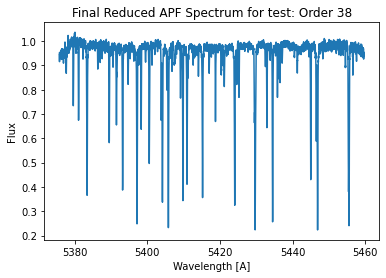

In [611]:
apf_wl_path = '/mnt_home/zoek/code/APF-BL-DAP/APFTutorial/apf_wav.fits'
apf_fl_path = '/datag/blpd0/datax/apf/rarj.224.fits'
solar_spectrum_path = '/mnt_home/zoek/code/APF-BL-DAP/APFTutorial/nso.fits'

wl_file = pf.open(apf_wl_path)
fl_file = pf.open(apf_fl_path)
wl_image = wl_file[0].data
fl_image = fl_file[0].data

order = 38
wl = wl_image[order]
flux = fl_image[order][:-1]

bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wl) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wl_values = []
fl_values = []

for index in indices:
    ind = int(index)
    wl_values = np.append(wl_values, wl[ind])
    fl_values = np.append(fl_values, flux[ind])
    
spl = splrep(wl_values, fl_values, s = 500000)
flux_fit = splev(wl, spl)

first_normalized_flux = flux / flux_fit

f = interp1d(wl, normalized_flux, kind='cubic')

flux98 = np.percentile(first_normalized_flux, 98)
flux = first_normalized_flux / flux98

solar_spectrum = pf.open(solar_spectrum_path)
wl_temp = solar_spectrum[0].data
fl_temp = solar_spectrum[1].data

# wavelengths of APF data
min_wl = min(wl) - 8
absolute_difference_function = lambda list_value : abs(list_value - min_wl)
w = min(wl_temp.tolist(), key = absolute_difference_function)
min_index = wl_temp.tolist().index(w)

max_wl = max(wl) + 8
absolute_difference_function = lambda list_value : abs(list_value - max_wl)
w = min(wl_temp.tolist(), key = absolute_difference_function)
max_index = wl_temp.tolist().index(w)

wl_syn = wl_temp[min_index:max_index]
fl_syn = fl_temp[min_index:max_index]


C = 299792.458 #in km/s

def chi(model, data):
    '''given two arrays of the same length, calculate chi-squared'''
    return np.sum((data - model) ** 2)

def model(velocity, wl_syn, fl_syn_norm, wl_APF):
    '''given a velocity shift, return corresponding shifted wavelength array, plot shifted wl_syn onto fl_syn, and
    interpolate onto wl_APF to match the length of the APF spectrum'''
    shifted_wl_syn = wl_syn[50:(len(wl_syn)-50)] - (wl_syn[50:(len(wl_syn)-50)] * velocity / C)
    dopshift_func = interp1d(shifted_wl_syn, fl_syn_norm[50:(len(wl_syn)-50)], kind = 'cubic')
    return dopshift_func(wl_APF)

def shift_APF(velocity, wl):
    '''given a velocity shift, return corresponding
    shifted APF wavelength array'''
    shifted_wl = wl[50:(len(wl)-50)] + (wl[50:(len(wl)-50)] * velocity / C)
    return shifted_wl

vel_min = -200
vel_max = 0
vel_spacing = 1

# plot up chi squared values for different velocities
vel_values = np.arange(vel_min, vel_max, vel_spacing)
chi_squared_values = []

for vel in vel_values:
    chi_squared = chi(model(vel, wl_syn, fl_syn, wl), flux)
    chi_squared_values = np.append(chi_squared_values, chi_squared)

# find the velocity shift corresponding to the miminum chi squared value
min_chi = np.amin(chi_squared_values)
vel_shift = vel_values[chi_squared_values.tolist().index(min_chi)]

# shift the APF spectrum by vel_shift
final_wl = shift_APF(vel_shift, wl)
final_fl = flux[50:(len(wl)-50)]
wl = final_wl
flux = final_fl
plt.plot(wl, flux)
plt.title('Final Reduced APF Spectrum for ' + star + ': Order ' + str(order))
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.show()

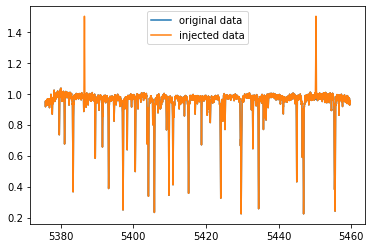

In [669]:
plt.plot(wl, flux, label = 'original data')

# choose random location to insert signal
random_val1 = np.random.choice(final_fl[100:-100], size = 1)
random_val2 = np.random.choice(final_fl[100:-100], size = 1)
location1 = final_fl.tolist().index(random_val1)
location2 = final_fl.tolist().index(random_val2)

# gaussian of width 4
spect = insert_gaussian(final_fl,[0.5, 6, 4, 1], location1, 10)

# gaussian of width 6
spect = insert_gaussian(spect,[0.5, 10, 6, 1], location2, 20)

# # gaussian of width 8
# spect = insert_gaussian(final_fl,[0.5, 10, 8, 1], location, 20)

# # gaussian of width 10
# spect = insert_gaussian(final_fl,[0.5, 15, 10, 1], location, 30)

plt.plot(wl, spect, label = 'injected data')
plt.legend()
# print(len(wl))

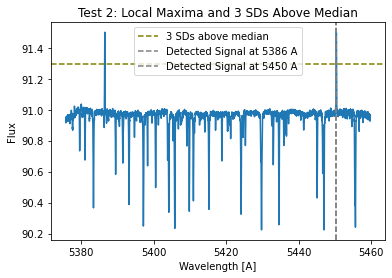

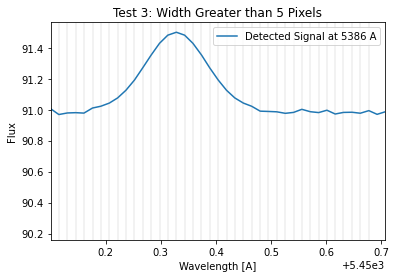

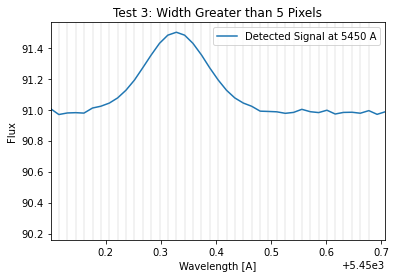

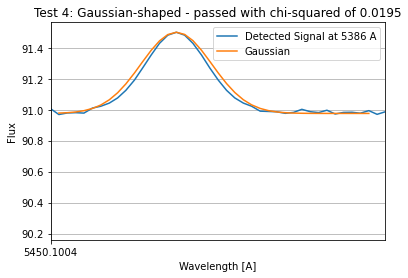

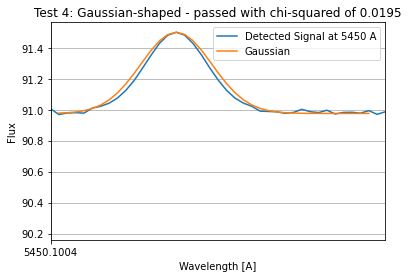

In [682]:
offset = 10
spect = spect + offset # to avoid negative and zero values 

median = np.median(spect)
SD = np.std(spect)

idxs1 = [] # indicies that are 3 SDs above the median flux value
idxs2 = [] # indicies in idxs1 that are local maximums
idxs3 = [] # indicies in idxs2 that are greater than 5 pixels in width
idxs4 = [] # indicies in idxs3 that are gaussian-shaped

plot = True 

# laser line search
for idx in np.arange(len(spect))[100:-100]:
    # first test: create an array of all indices that are above 3 SDs above median
    local_median = median
    local_std = SD
    # search each 200 pixel bin
    local_idxs_200 = np.arange(idx-100,idx+100)
    local_values_200 = spect[local_idxs_200]
    # find flux values greater than 3 SDs away from median
    if all(np.greater(spect[idx-2:idx+2], 3*local_std + local_median)):
        idxs1 = idxs1 + [idx]
        
for idx in idxs1:            
    # second test: keep the index if it is a local maximum  
    if spect[idx] >= spect[idx-1] and spect[idx] >= spect[idx+1]: 
        if spect[idx] > spect[idx-2] and spect[idx] > spect[idx+2]:
            idxs2 = idxs2 + [idx]
if (plot == True) & (idxs2 != []):
    plt.plot(wl, spect)
    plt.axhline(3*local_std + local_median, label= '3 SDs above median', color='olive', linestyle='--')
    for ind in idxs2:
        plt.axvline(x=wl[i], label= 'Detected Signal at ' + str(round(wl[ind])) + ' A', color='gray', linestyle='--')    
    plt.title('Test 2: Local Maxima and 3 SDs Above Median')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.legend()
    plt.show()
    
    
for idx in idxs2:
    # third test: determine if the signal is greater than 5 pixels in width
    # determine the left and right bounds of the peak - the left and rightmost points where
    # the flux value falls under the median     
    temp_ind = idx
    left_bound = 0
    while temp_ind > 0:
        temp_ind -= 1
        if spect[temp_ind] < median:
            left_bound = temp_ind
            break
    temp_ind = idx
    right_bound = len(spect)
    while temp_ind < len(spect):
        temp_ind += 1
        if spect[temp_ind] < median:
            right_bound = temp_ind
            break
    if ((right_bound - left_bound) > 5):
        idxs3 = idxs3 + [idx]
if (plot == True) & (idxs3 != []):
    for ind in idxs3:
        plt.plot(wl, spect, label = 'Detected Signal at ' + str(round(wl[ind])) + ' A') 
        plt.title('Test 3: Width Greater than 5 Pixels')
        plt.xlabel('Wavelength [A]')
        plt.xlim(wl[left_bound - 1], wl[right_bound + 1])
        for ind in np.arange(left_bound, right_bound):
            plt.axvline(x=wl[ind], color='gray', linestyle='-', linewidth=0.2)
        plt.ylabel('Flux')
        plt.legend()
        plt.show() 

for idx in idxs3:
    # fourth test: fit a gaussian to the peak, see how much signal resembles a gaussian      
    x = wl[left_bound:right_bound]
    y = spect[left_bound:right_bound]
    max_y = max(y)
    min_y = np.percentile(y, 5) 
    height = max_y - min_y
    ind = y.tolist().index(max_y)
    pos = x[ind]
    min_width = x[int((len(x) / 2) + (len(x) / 20))] - x[int((len(x) / 2) - (len(x) / 20))]
    max_width = x[int((len(x) / 2) + (len(x) / 5))] - x[int((len(x) / 2) - (len(x) / 5))]
    width_spacing = 0.1

    chi_squared_values = []
    width_vals = np.arange(min_width, max_width, width_spacing)
    for w in width_vals:
        gaus = gaussian(x, height, pos, w, min_y)
        chi_squared = chi(gaus, y)
        chi_squared_values = np.append(chi_squared_values, chi_squared)
    min_chi_squared = min(chi_squared_values)
    ind_of_min_chisquared = chi_squared_values.tolist().index(min_chi_squared)
    width = width_vals[ind_of_min_chisquared]
    gaus = gaussian(x, height, pos, width, min_y)
    passed = False
    if min_chi_squared < 1:
        passed = True
        idxs4 = idxs4 + [idx]
if (plot == True) & (idxs4 != []):
    for ind in idxs4:
        plt.plot(wl, spect, label = 'Detected Signal at ' + str(round(wl[ind])) + ' A')
        plt.plot(x, gaus, label = 'Gaussian')
        if passed == True:
            plt.title('Test 4: Gaussian-shaped - passed with chi-squared of ' + str(round(min_chi_squared, 4)))
        else:
            plt.title('Test 4: Gaussian-shaped - failed with chi-squared of ' + str(round(min_chi_squared, 4)))
        plt.xlabel('Wavelength [A]')
        plt.xlim(wl[left_bound - 1], wl[right_bound + 1])
        plt.ylabel('Flux')
        plt.xticks(np.arange(wl[left_bound - 1], wl[right_bound + 1]))
        plt.grid(which = 'both')
        plt.legend()
        plt.show() 